# Importando as bibliotecas que serão usadas

In [249]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Obtendo dados

In [250]:
iris_dataset = datasets.load_iris(as_frame=True)
iris_dataset

{'data':      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                  5.1               3.5                1.4               0.2
 1                  4.9               3.0                1.4               0.2
 2                  4.7               3.2                1.3               0.2
 3                  4.6               3.1                1.5               0.2
 4                  5.0               3.6                1.4               0.2
 ..                 ...               ...                ...               ...
 145                6.7               3.0                5.2               2.3
 146                6.3               2.5                5.0               1.9
 147                6.5               3.0                5.2               2.0
 148                6.2               3.4                5.4               2.3
 149                5.9               3.0                5.1               1.8
 
 [150 rows x 4 columns],
 'target': 0     

# Criação DataFrame

In [251]:
df_iris = pd.DataFrame(data=iris_dataset.data, columns=iris_dataset.feature_names)
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [252]:
df_iris['species'] = iris_dataset.target_names[iris_dataset.target]

# Analise exploratória dos dados

In [253]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [254]:
df_iris.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [255]:
df_iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [256]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [257]:
df_iris.shape

(150, 5)

In [258]:
df_iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


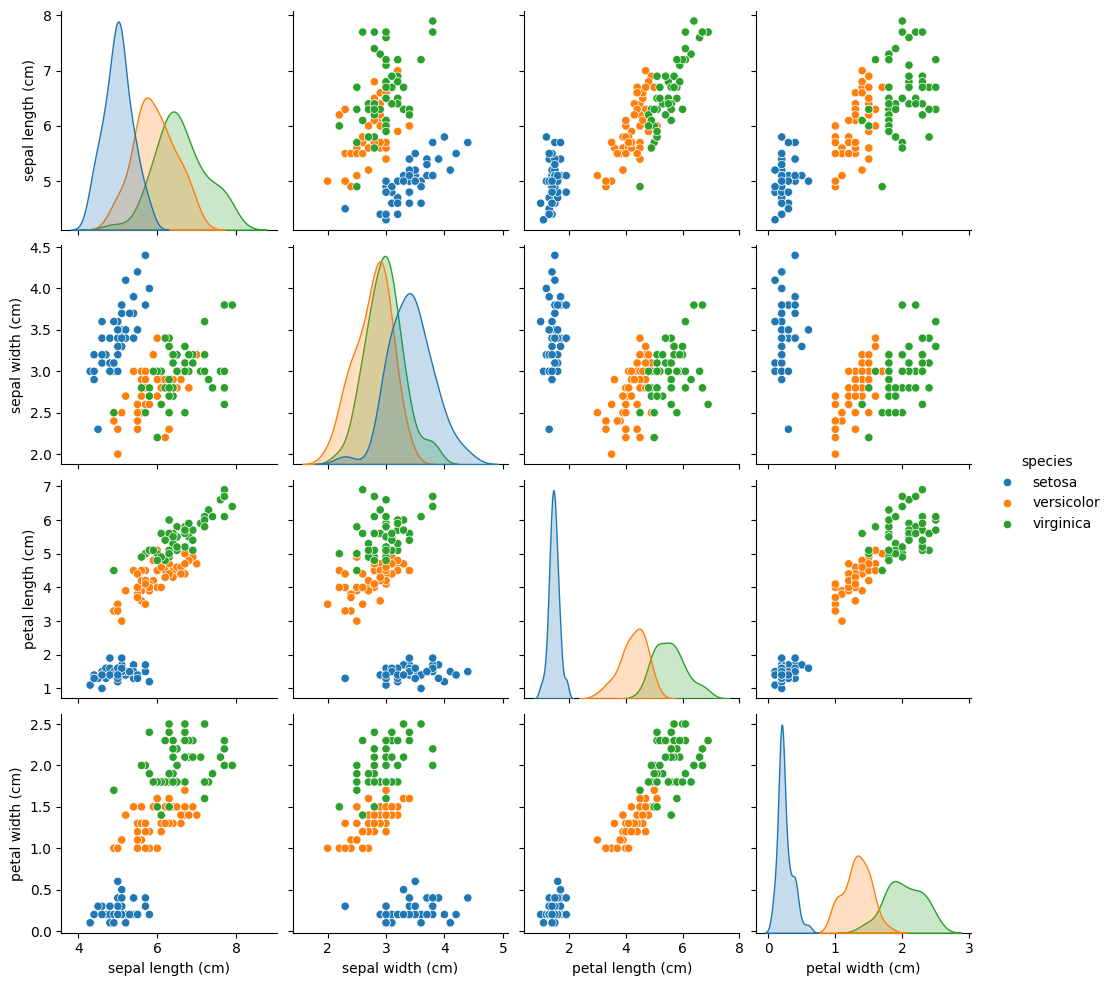

In [259]:
sns.pairplot(df_iris, hue='species')
plt.show()

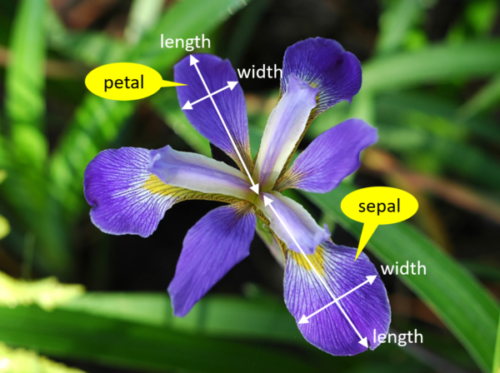

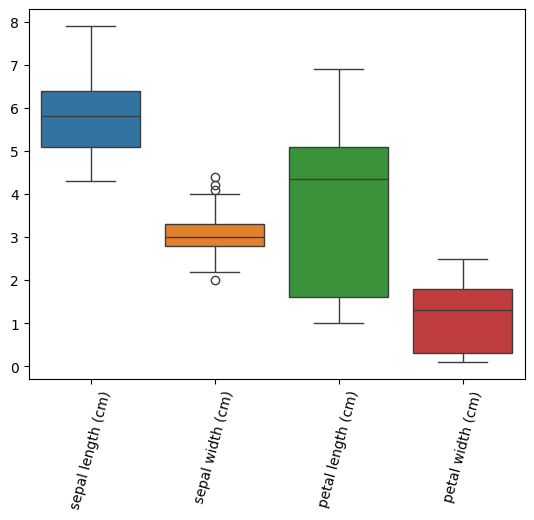

In [260]:
ax = sns.boxplot(data=df_iris)
plt.xticks(rotation=75)
plt.show()

# Preparação dos dados

In [261]:
#Limpeza nome das colunas
novas_colunas = list(map(lambda x: str(x).replace(" ", "_").replace("(","").replace(")","").strip(), df_iris.columns))

In [262]:
df_iris.rename(columns=dict(zip(df_iris.columns, novas_colunas)), inplace=True)

In [263]:
df_iris.head()


,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Enconding target

In [264]:
le = LabelEncoder()
target = le.fit_transform(df_iris['species'])
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [265]:
X = df_iris[['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm','petal_width_cm']]
y = target

# Separação teste e treino

In [266]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=41,shuffle=True)

In [267]:
print(f"X_train: {X_train.shape[0]}, X_test: {X_test.shape[0]}, y_train: {y_train.shape[0]}, y_test: {y_test.shape[0]}")

X_train: 120, X_test: 30, y_train: 120, y_test: 30


In [268]:
X_train.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
79,5.7,2.6,3.5,1.0
54,6.5,2.8,4.6,1.5
106,4.9,2.5,4.5,1.7
90,5.5,2.6,4.4,1.2
145,6.7,3.0,5.2,2.3


In [269]:
X_train.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
79,5.7,2.6,3.5,1.0
54,6.5,2.8,4.6,1.5
106,4.9,2.5,4.5,1.7
90,5.5,2.6,4.4,1.2
145,6.7,3.0,5.2,2.3


In [270]:
def treino_com_kneighbors():
    from sklearn.neighbors import KNeighborsClassifier    
    
    knn = KNeighborsClassifier(n_neighbors=5)
    
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    print(f'Accuracy KNeighborsClassifier: {accuracy * 100:.2f}%')

In [271]:
def treino_com_LogisticRegression():
    from sklearn.linear_model import LogisticRegression
    model = LogisticRegression(fit_intercept=True, max_iter=10000)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    print(f'Accuracy LogisticRegression: {accuracy * 100:.2f}%')



In [272]:
def treino_com_RandomForestClassifier():
    from sklearn.ensemble import RandomForestClassifier
    model = RandomForestClassifier()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f'Accuracy RandomForestClassifier: {accuracy * 100:.2f}%')



In [273]:
def treino_com_xgboots():
    import xgboost as xgb
    xgb_model = xgb.XGBClassifier()
    
    xgb_model.fit(X_train, y_train)

    y_pred = xgb_model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f'Accuracy XGBClassifier: {accuracy * 100:.2f}%')


In [274]:
treino_com_kneighbors()
treino_com_LogisticRegression()
treino_com_RandomForestClassifier()
treino_com_xgboots()

Accuracy KNeighborsClassifier: 96.67%
Accuracy LogisticRegression: 93.33%
Accuracy RandomForestClassifier: 90.00%
Accuracy XGBClassifier: 93.33%
